<AxesSubplot:xlabel='Year', ylabel='Sudden Deaths in Football'>

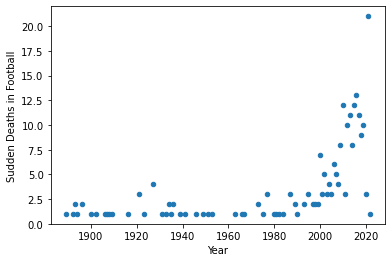

In [11]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

page = requests.get('https://en.wikipedia.org/wiki/List_of_association_footballers_who_died_while_playing').text
soup = BeautifulSoup(page, 'html.parser')
table = soup.find('table', class_="wikitable sortable")

df = pd.read_html(str(table))
df = pd.concat(df)
df.head()

pd.set_option('display.max_rows', df.shape[0]+1)

df['Date'].apply(lambda x: int(x[-4:])).value_counts().reset_index()\
.rename(columns={'index': 'Year', 'Date': 'Sudden Deaths in Football'}).sort_values('Year')\
.plot(kind = 'scatter', x = 'Year', y = 'Sudden Deaths in Football')